<a href="https://colab.research.google.com/github/Sukanya41455/Tensorflow_practice/blob/main/explorin_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy import misc
ascent_image = misc.ascent()

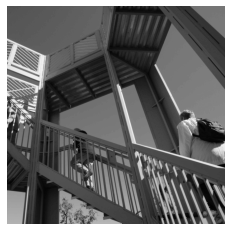

In [3]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

In [2]:
import numpy as np

#copy image to a numpy array
image_transformed = np.copy(ascent_image)

image_transformed.shape

(512, 512)

In [7]:
# Experiment with different values and see the effect
# filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
# filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

In [8]:
# iterate over the image
for x in range(1,image_transformed.shape[0]-1):
  for y in range(1, image_transformed.shape[1]-1):
    conv = 0.0
    conv += (ascent_image[x-1,y-1] * filter[0][0])
    conv += (ascent_image[x-1,y] * filter[0][1])
    conv += (ascent_image[x-1,y+1] * filter[0][2])
    conv += (ascent_image[x,y-1] * filter[1][0])
    conv += (ascent_image[x,y] * filter[1][1])
    conv += (ascent_image[x,y+1] * filter[1][2])
    conv += (ascent_image[x+1,y+1] * filter[2][0])
    conv += (ascent_image[x+1,y+1] * filter[2][1])
    conv += (ascent_image[x+1,y+1] * filter[2][2])

    conv = conv * weight

    if conv<0:
      conv=0
    if conv>255:
      conv=255

    image_transformed[x,y] = conv

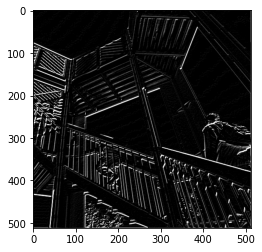

In [9]:
plt.gray()
plt.grid(False)
plt.imshow(image_transformed)
plt.show()

Effect of Max Pooling

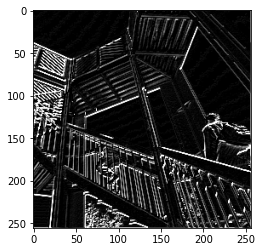

In [12]:
# assign dim half of org image
sizex = image_transformed.shape[0]
sizey = image_transformed.shape[1
                                ]
newx = int(sizex/2)
newy = int(sizey/2)

# blank image with reduced dimension
newimg = np.zeros((newx, newy))

for x in range(0, sizex, 2):
  for y in range(0, sizey, 2):
    pixels = []
    pixels.append(image_transformed[x,y])
    pixels.append(image_transformed[x+1,y])
    pixels.append(image_transformed[x,y+1])
    pixels.append(image_transformed[x+1,y+1])

    newimg[int(x/2),int(y/2)] = max(pixels)

plt.gray()
plt.grid(False)
plt.imshow(newimg)
plt.show()